In [1]:
!pwd

/home/kuan/tianchi-nlp-intro


（10月5日）**任务1**：报名比赛，下载比赛数据集并完成读取

In [1]:
import pandas as pd
train_df = pd.read_csv('./train_set.csv', sep='\t', nrows=100)
train_df['word'] = train_df['text'].apply(lambda x: len(x.split(' ')))

（10月5日）**任务2**：对数据集字符进行可视化，统计标签和字符分布
- [x] 统计数据集中所有句子所包含字符的平均个数
- [x] 统计数据集中不同类别下句子平均字符的个数
- [x] 统计数据集中类别分布的规律
- [x] 统计数据集中不同类别下句子中最常见的5个字符

In [2]:
label2id = {'科技': 0, '股票': 1, '体育': 2, '娱乐': 3, '时政': 4, '社会': 5, '教育': 6, '财经': 7, '家居': 8, '游戏': 9, '房产': 10, '时尚': 11, '彩票': 12, '星座': 13}
id2label = {v:k for k, v in label2id.items()}

In [3]:
avg = train_df['word'].mean()
print(f'统计数据集中所有句子所包含字符的平均个数: {avg:.2f}')

统计数据集中所有句子所包含字符的平均个数: 872.32


In [4]:
avg_by_label = train_df.groupby('label')['word'].mean()
for i, avg in enumerate(avg_by_label):
    label = id2label[i]
    print(f'\"{label}\"类别下的字符平均个数：{avg:.2f}')

"科技"类别下的字符平均个数：1096.54
"股票"类别下的字符平均个数：721.56
"体育"类别下的字符平均个数：1104.63
"娱乐"类别下的字符平均个数：512.17
"时政"类别下的字符平均个数：329.12
"社会"类别下的字符平均个数：1516.67
"教育"类别下的字符平均个数：2214.20
"财经"类别下的字符平均个数：1012.00
"家居"类别下的字符平均个数：435.67
"游戏"类别下的字符平均个数：565.67
"房产"类别下的字符平均个数：1177.67
"时尚"类别下的字符平均个数：425.00
"彩票"类别下的字符平均个数：374.00
"星座"类别下的字符平均个数：131.00


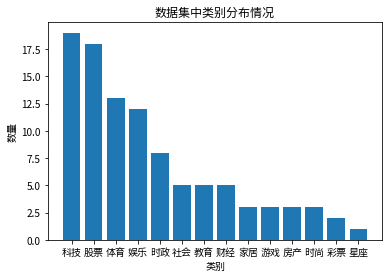

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

label_counts = train_df['label'].value_counts()
labels = [label for label in label2id]
plt.bar(labels, label_counts)
plt.title('数据集中类别分布情况')
plt.xlabel('类别')
plt.ylabel('数量')
plt.show()

In [15]:
print('统计数据集中不同类别下句子中最常见的5个字符:\n')
import collections

for i in range(len(labels)):
    df = train_df[train_df['label'] == i]
    words_list = []
    for text in df['text']:
        words_list += text.split()
    words_counter = collections.Counter(words_list)
    print(i, id2label[i], words_counter.most_common(5))

统计数据集中不同类别下句子中最常见的5个字符:

0 科技 [('3750', 610), ('648', 458), ('900', 298), ('6122', 179), ('3370', 150)]
1 股票 [('3750', 531), ('648', 314), ('3370', 211), ('4464', 189), ('900', 186)]
2 体育 [('3750', 956), ('648', 541), ('900', 434), ('4704', 225), ('1667', 212)]
3 娱乐 [('3750', 239), ('648', 127), ('900', 87), ('2465', 65), ('4939', 62)]
4 时政 [('3750', 78), ('648', 63), ('900', 56), ('4464', 40), ('4411', 35)]
5 社会 [('3750', 193), ('648', 135), ('900', 98), ('4939', 66), ('5598', 53)]
6 教育 [('3750', 491), ('648', 450), ('2555', 297), ('5620', 215), ('900', 207)]
7 财经 [('3750', 214), ('3370', 134), ('648', 106), ('900', 100), ('4464', 85)]
8 家居 [('3750', 68), ('648', 42), ('913', 33), ('5305', 21), ('4326', 20)]
9 游戏 [('3750', 51), ('3370', 35), ('3317', 31), ('7010', 27), ('7539', 26)]
10 房产 [('3750', 152), ('648', 84), ('2999', 64), ('900', 57), ('408', 57)]
11 时尚 [('3750', 102), ('648', 73), ('900', 40), ('5310', 27), ('3809', 24)]
12 彩票 [('4464', 59), ('6220', 59), ('3659', 46), ('337